(520, 696)


array([[140, 135, 137, ..., 246, 249, 251],
       [139, 139, 142, ..., 237, 244, 258],
       [139, 144, 138, ..., 241, 250, 261],
       ...,
       [552, 541, 548, ..., 817, 847, 825],
       [608, 553, 588, ..., 874, 844, 860],
       [662, 602, 603, ..., 855, 890, 959]], dtype=uint16)

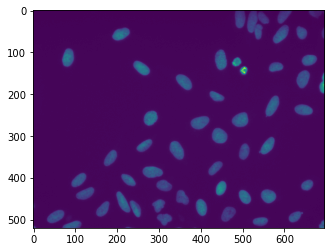

In [5]:
import matplotlib.pyplot as plt
I = plt.imread('../0.download-data/data/BBBC022_v1_images_20585w1/IXMtest_A02_s2_w1D18DF60D-A77E-4A79-B823-CA9754A95240.tif')
print(I.shape)
plt.imshow(I)
I

In [6]:
import numpy as np
import os
from glob import glob

In [7]:
# DATA_FOLDER = '../0.download-data/data'
# filenames = np.array(glob(os.path.join(DATA_FOLDER, '*/*.tif')))
# filenames
# images = ['../0.download-data/data/BBBC022_v1_images_20585w1/{}'.format(i) for i in os.listdir(data_dir)]
files = os.listdir('../0.download-data/data/BBBC022_v1_images_20585w1')

In [14]:
# for file in files[300:310]:
#     plt.imshow(plt.imread('../0.download-data/data/BBBC022_v1_images_20585w1/' + file))
#     plt.show()

In [19]:
train = []
for file in files:
    train.append(plt.imread('../0.download-data/data/BBBC022_v1_images_20585w1/' + file))
# train = np.array(train)


In [23]:
train = np.array(train)


In [24]:
x_train = train[:3000]
x_test = train[3000:]

In [25]:
train.shape
x_train = x_train.astype('float32') / 765.
x_test = x_test.astype('float32') / 765.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print( x_train.shape)
print( x_test.shape)

(3000, 361920)
(456, 361920)


Using TensorFlow backend.
/home/ubuntu/miniconda3/envs/cell-painting-vae/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ubuntu/miniconda3/envs/cell-painting-vae/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ubuntu/miniconda3/envs/cell-painting-vae/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16",

11493376/11490434 [==============================] - 0s 0us/step


/home/ubuntu/miniconda3/envs/cell-painting-vae/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ubuntu/miniconda3/envs/cell-painting-vae/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ubuntu/miniconda3/envs/cell-painting-vae/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.i

In [30]:
x_train.shape

(3000, 361920)

In [50]:
# from keras.preprocessing.image import ImageDataGenerator
# INPUT_DIM = (520, 696)
# BATCH_SIZE = 10
# data_flow = ImageDataGenerator(rescale=1./255).flow_from_directory(DATA_FOLDER, 
#                                                                    target_size = INPUT_DIM[:2],
#                                                                    batch_size = BATCH_SIZE,
#                                                                    shuffle = True,
#                                                                    class_mode = 'input',
#                                                                    subset = 'training'
#                                                                    )
# data_flow

Found 3456 images belonging to 2 classes.


In [27]:
import sys
sys.path.insert(0, "../../scripts")

from vae import VAE

In [35]:
l_vae = VAE(
    input_dim=x_train.shape[1],
    latent_dim=100,
    batch_size=512,
    encoder_batch_norm=True,
    epochs=10,
    learning_rate= 0.01,
    encoder_architecture=[],
    decoder_architecture=[],
    beta=1,
    verbose=True,
)
l_vae.compile_vae()

In [36]:
l_vae.train(x_train=x_train, x_test=x_test)

Train on 3000 samples, validate on 456 samples
Epoch 1/10
3000/3000 [==============================] - 20s 7ms/sample - loss: 269777.6177 - val_loss: 532220804595712.0000
Epoch 2/10
3000/3000 [==============================] - 16s 5ms/sample - loss: 315695.6895 - val_loss: 3101099.2500
Epoch 3/10
3000/3000 [==============================] - 16s 5ms/sample - loss: 586321.8150 - val_loss: 2139704.5000
Epoch 4/10
3000/3000 [==============================] - 16s 5ms/sample - loss: 333385.4796 - val_loss: 1766594.2500
Epoch 5/10
3000/3000 [==============================] - 16s 5ms/sample - loss: 443219.1628 - val_loss: 1669600.2500
Epoch 6/10
3000/3000 [==============================] - 16s 5ms/sample - loss: 437632.4187 - val_loss: 915274.5000
Epoch 7/10
3000/3000 [==============================] - 16s 5ms/sample - loss: 253187.9179 - val_loss: 640318.3750
Epoch 8/10
3000/3000 [==============================] - 16s 5ms/sample - loss: 260478.1482 - val_loss: 568739.7500
Epoch 9/10
3000/3000

In [43]:
reconstruction = l_vae.vae.predict(x_train)

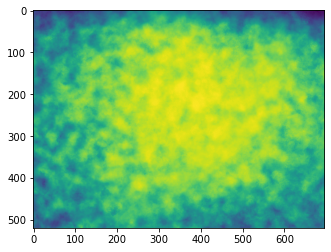

In [46]:
plt.imshow(reconstruction[0].reshape(520, 696))

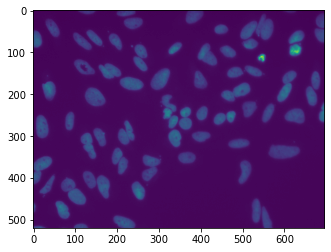

In [49]:
plt.imshow(x_train[0].reshape(520, 696))